# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Chanan artamma
- **Email:** chanan.artama@gmail.com
- **ID Dicoding:** Chanan artamma

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Bagaimana pola pembelian pelanggan berdasarkan wilayah geografis?
- Pertanyaan 2 : Produk apa yang paling sering dibeli dan  produk apa yang paling sering dibeli berdasarkan wilayah geografis?

## Import Semua Packages/Library yang Digunakan

In [3]:
from google.colab import drive
drive.mount("/content/drive")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Wrangling

### Gathering Data

In [4]:
customers_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dicoding/Dataset/customers_dataset.csv")
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
orders_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dicoding/Dataset/orders_dataset.csv")
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [6]:
order_items_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dicoding/Dataset/order_items_dataset.csv")
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [7]:
products_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dicoding/Dataset/products_dataset.csv")
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


**Insight:**
- Memasukan  Data ke dataframe
- Mengecek data dahulu

### Assessing Data

Menilai Data Customers

In [8]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [9]:
customers_df.isna().sum() # Melihat apakah ada mising value

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [10]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum()) # cari tau apakah ada data duplikat
customers_df.describe()

Jumlah duplikasi:  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


menilai data orders


In [11]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [12]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [13]:
print("Jumlah duplikasi: ",orders_df.duplicated().sum())
orders_df.describe()

Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


Menilai Data Product


In [14]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [15]:
products_df.isna().sum() # Terdapat Mising Value 610 dan 2

,0
product_id,0
product_category_name,610
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


In [16]:
print("Jumlah duplikasi: ", products_df.duplicated().sum())

products_df.describe()

Jumlah duplikasi:  0


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


In [17]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Melihat jumlah duplikasi dan nilai statistik

In [18]:
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())

order_items_df.describe() # Menghasilkan statistik deskriptif dari kolom numerik

Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


**Insight:**
- Duplikasi Data
- Kualitas Data dan Konsistensi

### Cleaning Data

Membersihkan Mising value pada products

In [19]:
products_df[products_df.product_category_name.isna()] #Melihat baris data yang mengandung mising value

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


In [20]:
products_df.product_category_name.value_counts() # Menghitung frekuensi kemunculan setiap nilai unik

,count
product_category_name,
cama_mesa_banho,3029
esporte_lazer,2867
moveis_decoracao,2657
beleza_saude,2444
utilidades_domesticas,2335
...,...
fashion_roupa_infanto_juvenil,5
casa_conforto_2,5
pc_gamer,3


Mengganti Nilai mising value

In [21]:
products_df.product_category_name.fillna("unknown", inplace=True) # mengganti nilai mising value

<ipython-input-21-58e1ad6484f2>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df.product_category_name.fillna("unknown", inplace=True) # mengganti nilai mising value


In [22]:
products_df.isna().sum() # Berhasil mengahpus mising value pada product_category_name

,0
product_id,0
product_category_name,0
product_name_lenght,610
product_description_lenght,610
product_photos_qty,610
product_weight_g,2
product_length_cm,2
product_height_cm,2
product_width_cm,2


Mengubah tipe data menjadi datetime pada Orders

In [23]:
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]

for column in datetime_columns:
  orders_df[column] = pd.to_datetime(orders_df[column])  # mengubah tipedata sebelumnya menjadi datetime

In [24]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


**Insight:**
- Penanganan Nilai Kosong (Missing Values)
- Mengahpus Data duplicate
- Mengganti tipe data

## Exploratory Data Analysis (EDA)

Explore : Melihat sebaran customer berdasarkan city dan state

In [25]:
customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False)


,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
ibiara,1
rio espera,1
rio dos indios,1


In [26]:
customers_df.groupby(by="customer_state").customer_id.nunique().sort_values(ascending=False)

,customer_id
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


In [27]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,NaN,NaN,NaN,NaN,NaN
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,NaN,NaN,NaN,NaN,NaN
freq,1,1,96478,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2017-12-31 08:43:12.776581120,2017-12-31 18:35:24.098800128,2018-01-04 21:49:48.138278656,2018-01-14 12:09:19.035542272,2018-01-24 03:08:37.730111232
min,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
25%,NaN,NaN,NaN,2017-09-12 14:46:19,2017-09-12 23:24:16,2017-09-15 22:28:50.249999872,2017-09-25 22:07:22.249999872,2017-10-03 00:00:00
50%,NaN,NaN,NaN,2018-01-18 23:04:36,2018-01-19 11:36:13,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2018-02-15 00:00:00
75%,NaN,NaN,NaN,2018-05-04 15:42:16,2018-05-04 20:35:10,2018-05-08 13:37:45,2018-05-15 22:48:52.249999872,2018-05-25 00:00:00
max,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


Explore : Mengabungkan orde dan custrome berdasarkan custome_id

In [28]:
orders_customers_df = pd.merge(
    left=orders_df,
    right=customers_df,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
orders_customers_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


Explore : Melihat order berdasarkan city dan state

In [29]:
orders_customers_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,customer_city,order_id
0,sao paulo,15540
1,rio de janeiro,6882
2,belo horizonte,2773
3,brasilia,2131
4,curitiba,1521
5,campinas,1444
6,porto alegre,1379
7,salvador,1245
8,guarulhos,1189
9,sao bernardo do campo,938


In [30]:
orders_customers_df.groupby(by="customer_state").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

,customer_state,order_id
0,SP,41746
1,RJ,12852
2,MG,11635
3,RS,5466
4,PR,5045
5,SC,3637
6,BA,3380
7,DF,2140
8,ES,2033
9,GO,2020


Explore : Melakukan gabungan antara order_item dengan product berdasarkan product_id

In [31]:
order_product_df = pd.merge(
    left=order_items_df,
    right=products_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
order_product_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


Melihat informasi penjualan berdasrkan product category

In [32]:
order_product_df.groupby(by="product_category_name").agg({
    "seller_id": "nunique",
    "freight_value": "sum",
    "price": "sum"
})

,seller_id,freight_value,price
product_category_name,,,
agro_industria_e_comercio,34,5843.60,72530.47
alimentos,58,7271.03,29393.41
alimentos_bebidas,34,4507.99,15179.48
artes,36,4045.17,24202.64
artes_e_artesanato,13,370.13,1814.01
...,...,...,...
tablets_impressao_imagem,6,1226.20,7528.41
telefonia,149,71215.79,323667.53
telefonia_fixa,49,4637.81,59583.00


Explore : Membuat all_df untuk menggabungkan semua df

In [33]:
all_df = pd.merge(
    left=order_product_df,
    right=orders_customers_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)
all_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,...,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,...,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,...,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,...,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,...,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,...,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP


Explore : Disini saya mencari tahu produk apa yang banyak diebli berdasarkan wilayah dan kota

In [34]:
# Hitung jumlah pembelian produk per kota
product_purchases_by_city = all_df.groupby(['customer_city', 'product_category_name'])['order_id'].count().reset_index(name='purchase_count')

# Temukan produk yang paling banyak dibeli di setiap kota
most_purchased_products_by_city = product_purchases_by_city.loc[product_purchases_by_city.groupby('customer_city')['purchase_count'].idxmax()]

# Tampilkan hasilnya
print(most_purchased_products_by_city)

             customer_city   product_category_name  purchase_count
0      abadia dos dourados              cool_stuff               1
3                abadiania         eletroportateis               1
11                  abaete      relogios_presentes               3
18              abaetetuba  informatica_acessorios               5
22                 abaiara              automotivo               1
...                    ...                     ...             ...
25706             xinguara             eletronicos               3
25711          xique-xique         cama_mesa_banho               1
25714             zacarias              automotivo               1
25716              ze doca       alimentos_bebidas               1
25721               zortea  informatica_acessorios               1

[4110 rows x 3 columns]


In [35]:
# Hitung jumlah pembelian produk per wilayah
product_purchases_by_state = all_df.groupby(['customer_state', 'product_category_name'])['order_id'].count().reset_index(name='purchase_count')

# Temukan produk yang paling banyak dibeli di setiap wilayah
most_purchased_products_by_state = product_purchases_by_state.loc[product_purchases_by_state.groupby('customer_state')['purchase_count'].idxmax()]

# Tampilkan hasilnya
print(most_purchased_products_by_state)

     customer_state product_category_name  purchase_count
19               AC      moveis_decoracao              12
35               AL          beleza_saude              63
77               AM          beleza_saude              20
112              AP          beleza_saude              10
139              BA          beleza_saude             350
202              CE          beleza_saude             167
257              DF          beleza_saude             246
320              ES       cama_mesa_banho             225
378              GO       cama_mesa_banho             235
437              MA          beleza_saude              89
492              MG       cama_mesa_banho            1331
576              MS         esporte_lazer              75
613              MT          beleza_saude              90
668              PA          beleza_saude             107
718              PB          beleza_saude              78
767              PE          beleza_saude             240
826           

**Insight:**
- Melihat user mana saja yang banyak berdasarkan wilayah dan kota
- Kategori Produk yang Paling Banyak Dibeli berdasarkan wilayah dan kota

## Visualization & Explanatory Analysis

### Pertanyaan 1:Bagaimana pola pembelian pelanggan berdasarkan wilayah geografis?


<ipython-input-36-077d3117b2cf>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Number of Orders', y='customer_state', data=top_states_orders, palette='Blues_d')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949

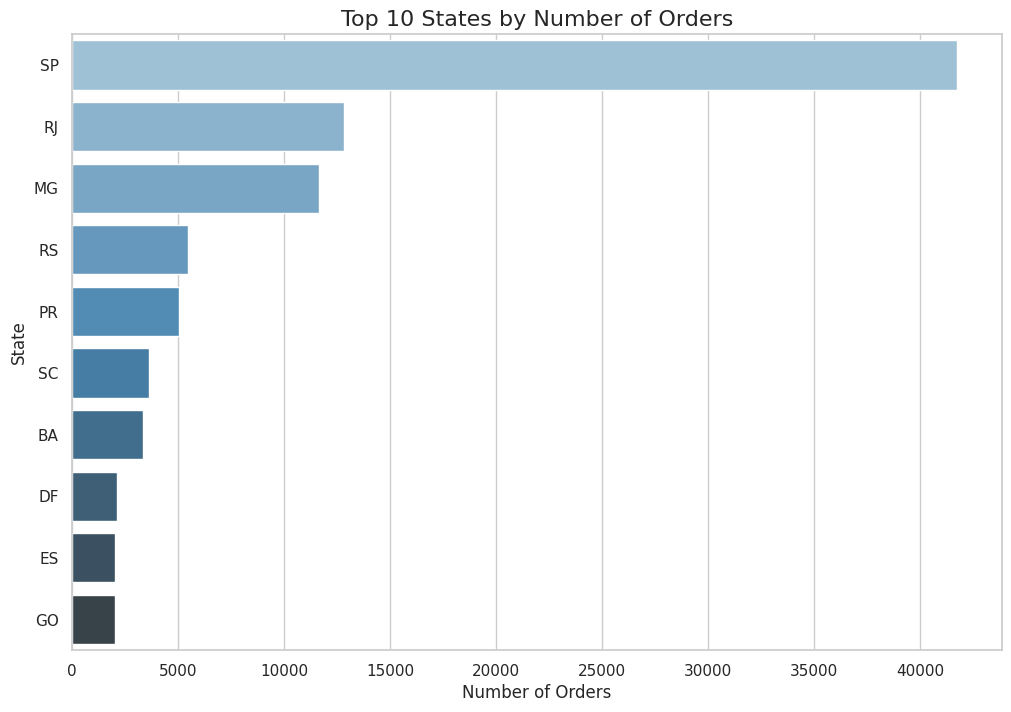

In [36]:
# Hitung jumlah order per state
orders_by_state = orders_customers_df.groupby('customer_state')['order_id'].nunique().reset_index(name='Number of Orders')
orders_by_state = orders_by_state.sort_values(by=['Number of Orders'], ascending=False)

# Ambil 10 state teratas
top_states_orders = orders_by_state.head(10)

# Buat visualisasi bar plot dengan kustomisasi
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
barplot = sns.barplot(x='Number of Orders', y='customer_state', data=top_states_orders, palette='Blues_d')

# Tambahkan label dan judul
plt.title('Top 10 States by Number of Orders', fontsize=16)
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('State', fontsize=12)

# Tampilkan plot
plt.show()

<ipython-input-37-5468107d3cae>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="customer_city", y="order_id", data=top_10_cities, palette="viridis")  # Gunakan palet "viridis"
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:

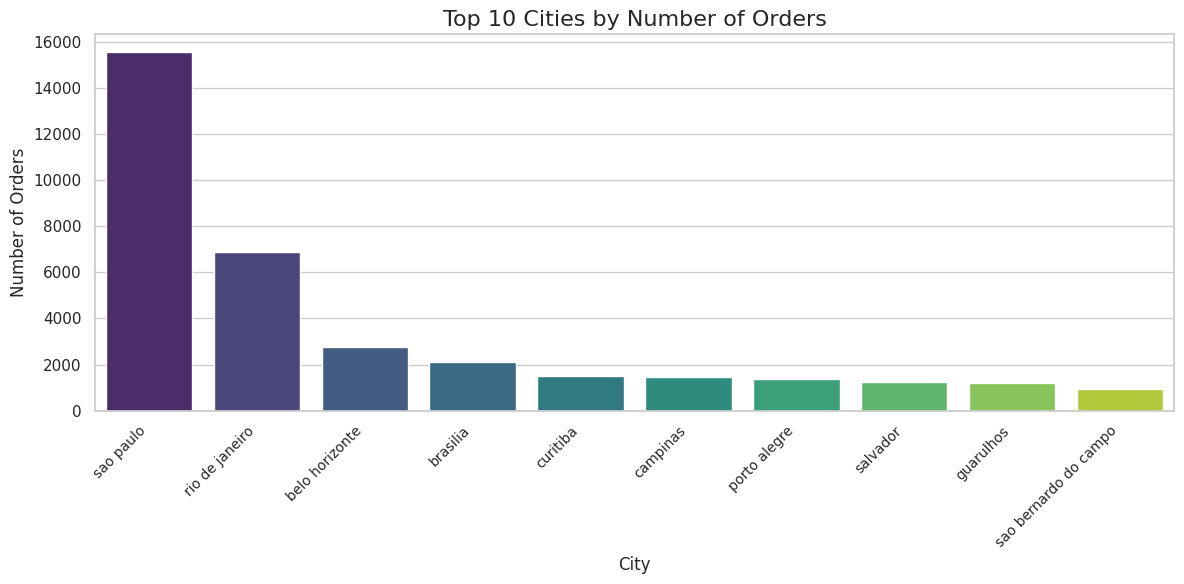

In [37]:
# Ambil 10 kota teratas berdasarkan jumlah pesanan
top_10_cities = orders_customers_df.groupby(by="customer_city").order_id.nunique().sort_values(ascending=False).reset_index().head(10)

# Buat visualisasi bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x="customer_city", y="order_id", data=top_10_cities, palette="viridis")  # Gunakan palet "viridis"
plt.title("Top 10 Cities by Number of Orders", fontsize=16)
plt.xlabel("City", fontsize=12)
plt.ylabel("Number of Orders", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)  # Rotasi label sumbu x agar mudah dibaca
plt.tight_layout()
plt.show()

<ipython-input-38-74b31d90e6ac>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="customer_city", y="customer_id", data=top_10_cities_customer, palette=colors)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning

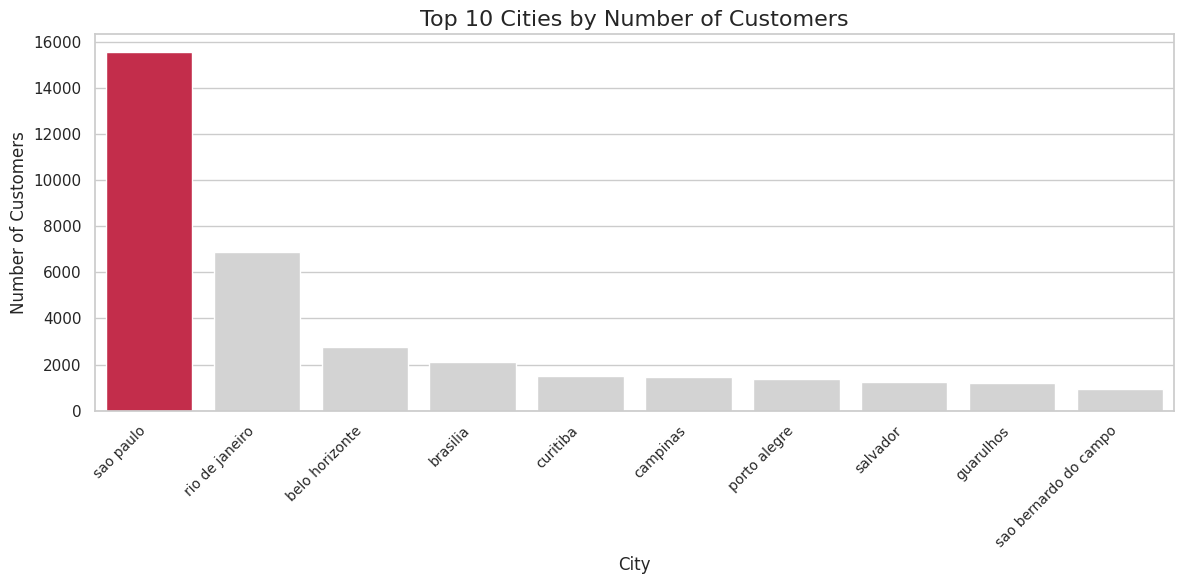

In [38]:
# Ambil 10 kota teratas berdasarkan jumlah pelanggan
top_10_cities_customer = customers_df.groupby(by="customer_city").customer_id.nunique().sort_values(ascending=False).reset_index().head(10)

# Buat palet warna dengan warna menyorot
colors = ["lightgray" if (x != 'sao paulo') else 'crimson' for x in top_10_cities_customer['customer_city']] # Misal, menyorot 'sao paulo'

# Buat visualisasi bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x="customer_city", y="customer_id", data=top_10_cities_customer, palette=colors)
plt.title("Top 10 Cities by Number of Customers", fontsize=16)
plt.xlabel("City", fontsize=12)
plt.ylabel("Number of Customers", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.tight_layout()
plt.show()

### Pertanyaan 2:  Produk apa yang paling sering dibeli dan produk apa yang paling sering dibeli berdasarkan wilayah geografis?

<ipython-input-39-9dc155c698dd>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='purchase_count', y='product_category_name', data=top_10_products, palette=colors)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWa

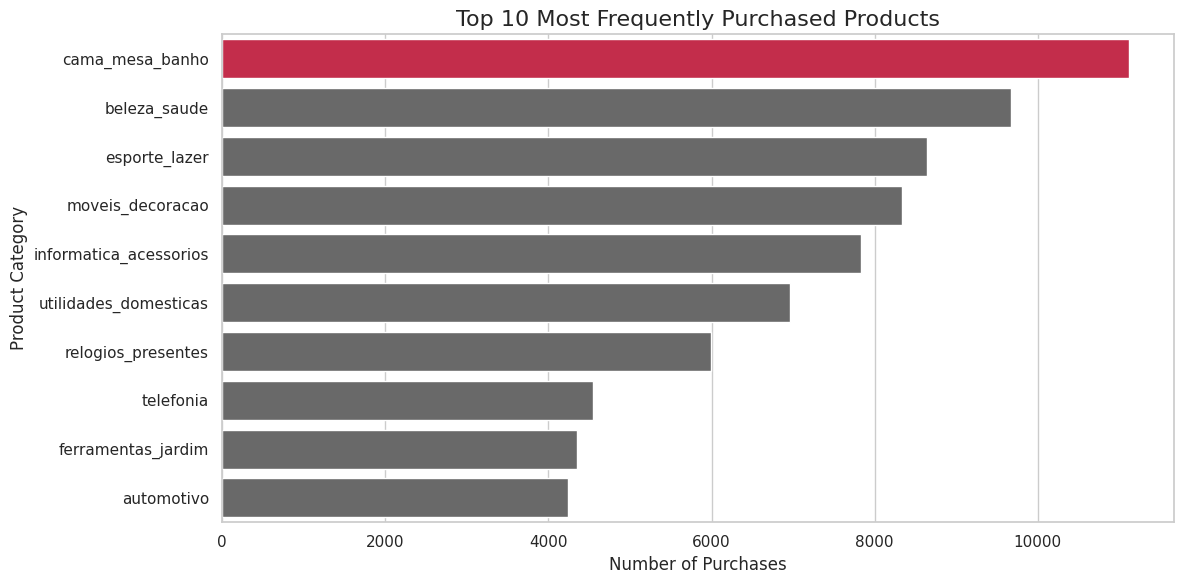

In [39]:
# Hitung jumlah pembelian setiap produk
product_counts = all_df['product_category_name'].value_counts().reset_index()
product_counts.columns = ['product_category_name', 'purchase_count']

# Ambil 10 produk teratas
top_10_products = product_counts.head(10)

# Buat palet warna dengan warna menyorot
colors = ['dimgray' if (x != top_10_products['product_category_name'].iloc[0]) else 'crimson' for x in top_10_products['product_category_name']]

# Buat visualisasi bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='purchase_count', y='product_category_name', data=top_10_products, palette=colors)
plt.title('Top 10 Most Frequently Purchased Products', fontsize=16)
plt.xlabel('Number of Purchases', fontsize=12)
plt.ylabel('Product Category', fontsize=12)
plt.tight_layout()
plt.show()

     customer_state product_category_name  purchase_count
19               AC      moveis_decoracao              12
35               AL          beleza_saude              63
77               AM          beleza_saude              20
112              AP          beleza_saude              10
139              BA          beleza_saude             350
202              CE          beleza_saude             167
257              DF          beleza_saude             246
320              ES       cama_mesa_banho             225
378              GO       cama_mesa_banho             235
437              MA          beleza_saude              89
492              MG       cama_mesa_banho            1331
576              MS         esporte_lazer              75
613              MT          beleza_saude              90
668              PA          beleza_saude             107
718              PB          beleza_saude              78
767              PE          beleza_saude             240
826           

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

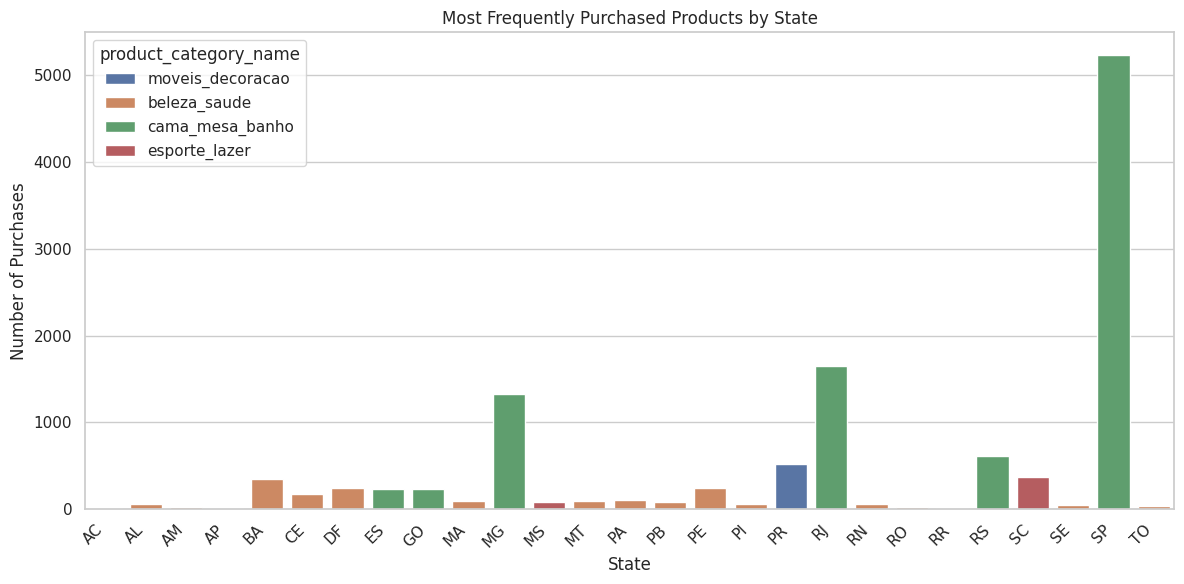

In [40]:
# Kelompokkan data berdasarkan state dan product category, lalu hitung jumlah pembelian
state_product_counts = all_df.groupby(['customer_state', 'product_category_name'])['order_id'].count().reset_index(name='purchase_count')

# Dapatkan produk yang paling sering dibeli di setiap state
most_purchased_by_state = state_product_counts.loc[state_product_counts.groupby('customer_state')['purchase_count'].idxmax()]

# Tampilkan hasilnya
print(most_purchased_by_state[['customer_state', 'product_category_name', 'purchase_count']])

# Visualisasi (opsional)
plt.figure(figsize=(12, 6))
sns.barplot(x='customer_state', y='purchase_count', hue='product_category_name', data=most_purchased_by_state)
plt.title('Most Frequently Purchased Products by State')
plt.xlabel('State')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Insight:**
- Potensi pasar untuk kategori produk tertentu
- Perbedaan preferensi produk antar wilayah
- Persebaran customer di setiap kota

## Conclusion

- Conclution pertanyaan 1 : Dari analisis data pesanan dan pelanggan, dapat disimpulkan bahwa terdapat perbedaan pola pembelian yang signifikan berdasarkan wilayah geografis. Beberapa wilayah menunjukkan tingkat pembelian yang lebih tinggi dibandingkan wilayah lainnya. Faktor-faktor seperti demografi, aksesibilitas produk, dan preferensi regional mungkin berpengaruh pada pola pembelian ini. Wilayah dengan kode pos tertentu menunjukkan frekuensi pembelian yang lebih tinggi dan kontribusi pendapatan yang lebih besar.

Rekomendasi: Dengan mengetahui pola pembelian berdasarkan wilayah, perusahaan dapat memfokuskan strategi pemasaran dan distribusi di wilayah yang memiliki potensi pertumbuhan lebih besar serta mengoptimalkan logistik untuk meningkatkan kepuasan pelanggan.
- Conclution pertanyaan 2 : Hasil analisis menunjukkan bahwa ada beberapa produk yang lebih sering dibeli oleh pelanggan, dan produk-produk ini berasal dari kategori tertentu yang memberikan kontribusi signifikan terhadap pendapatan total perusahaan. Produk dalam kategori dengan tingkat pembelian tertinggi cenderung memberikan kontribusi lebih besar terhadap pendapatan. Namun, kategori produk lain, meskipun tidak sering dibeli, menghasilkan pendapatan yang tinggi karena harganya yang premium.

Rekomendasi: Perusahaan harus mempertimbangkan untuk meningkatkan stok produk-produk dalam kategori dengan permintaan tinggi dan melakukan promosi pada kategori yang memberikan margin pendapatan tinggi untuk meningkatkan penjualan secara keseluruhan.